In [1]:
from pathlib import Path
import os
import sys
import json
import torch
import numpy as np

In [14]:
base_dir = Path('/mnt/data/eth3d_processed_monosdf')

In [3]:
for scene in sorted(base_dir.iterdir()):
    transform_path = scene / 'transforms.json'
    with open(transform_path, 'r') as f:
        transforms = json.load(f)
    frames = transforms['frames']

    if all([(key in transforms) for key in ['fl_x', 'fl_y', 'cx', 'cy']]):
        K = np.eye(4)
        K[0, 0] = transforms['fl_x']
        K[1, 1] = transforms['fl_y']
        K[0, 2] = transforms['cx']
        K[1, 2] = transforms['cy']
        intrinsic = K
        focal_length = K[0, 0]

    file_num = len(frames)
    cameras = {}
    for index in range(file_num):
        frame = frames[index]
        pose = np.array(frame['transform_matrix']).reshape(4, 4)
        pose[:, 1:3] *= -1
        cameras["scale_mat_%d"%(index)] = np.eye(4)
        cameras["world_mat_%d"%(index)] = K @ np.linalg.inv(pose)

    out_path = str(scene)
    np.savez(os.path.join(out_path, "cameras.npz"), **cameras)


# For cameras_train.npz

In [15]:
for scene in sorted(base_dir.iterdir()):
    transform_path = scene / 'transforms_train.json'
    with open(transform_path, 'r') as f:
        transforms = json.load(f)
    frames = transforms['frames']

    if all([(key in transforms) for key in ['fl_x', 'fl_y', 'cx', 'cy']]):
        K = np.eye(4)
        K[0, 0] = transforms['fl_x']
        K[1, 1] = transforms['fl_y']
        K[0, 2] = transforms['cx']
        K[1, 2] = transforms['cy']
        intrinsic = K
        focal_length = K[0, 0]

    file_num = len(frames)
    cameras = {}
    for index in range(file_num):
        frame = frames[index]
        pose = np.array(frame['transform_matrix']).reshape(4, 4)
        pose[:, 1:3] *= -1
        cameras["scale_mat_%d"%(index)] = np.eye(4)
        cameras["world_mat_%d"%(index)] = K @ np.linalg.inv(pose)

    out_path = str(scene)
    np.savez(os.path.join(out_path, "cameras_train.npz"), **cameras)


## For TNT


In [2]:
base_dir = Path('/mnt/data/tnt_processed_monosdf')

In [3]:
for scene in sorted(base_dir.iterdir()):
    transform_path = scene / 'transforms.json'
    with open(transform_path, 'r') as f:
        transforms = json.load(f)
    frames = transforms['frames']

    if all([(key in transforms) for key in ['fl_x', 'fl_y', 'cx', 'cy']]):
        K = np.eye(4)
        K[0, 0] = transforms['fl_x']
        K[1, 1] = transforms['fl_y']
        K[0, 2] = transforms['cx']
        K[1, 2] = transforms['cy']
        intrinsic = K
        focal_length = K[0, 0]

    file_num = len(frames)
    cameras = {}
    for index in range(file_num):
        frame = frames[index]
        pose = np.array(frame['transform_matrix']).reshape(4, 4)
        pose[:, 1:3] *= -1
        cameras["scale_mat_%d"%(index)] = np.eye(4)
        cameras["world_mat_%d"%(index)] = K @ np.linalg.inv(pose)

    out_path = str(scene)
    np.savez(os.path.join(out_path, "cameras.npz"), **cameras)


for scene in sorted(base_dir.iterdir()):
    transform_path = scene / 'transforms_train.json'
    with open(transform_path, 'r') as f:
        transforms = json.load(f)
    frames = transforms['frames']

    if all([(key in transforms) for key in ['fl_x', 'fl_y', 'cx', 'cy']]):
        K = np.eye(4)
        K[0, 0] = transforms['fl_x']
        K[1, 1] = transforms['fl_y']
        K[0, 2] = transforms['cx']
        K[1, 2] = transforms['cy']
        intrinsic = K
        focal_length = K[0, 0]

    file_num = len(frames)
    cameras = {}
    for index in range(file_num):
        frame = frames[index]
        pose = np.array(frame['transform_matrix']).reshape(4, 4)
        pose[:, 1:3] *= -1
        cameras["scale_mat_%d"%(index)] = np.eye(4)
        cameras["world_mat_%d"%(index)] = K @ np.linalg.inv(pose)

    out_path = str(scene)
    np.savez(os.path.join(out_path, "cameras_train.npz"), **cameras)


In [18]:
np.array(frame['transform_matrix']).view(4,4)

ValueError: Type must be a sub-type of ndarray type

In [5]:
depth_dir = Path('/mnt/data/eth3d_processed_monosdf/courtyard/depths')
import cv2
import matplotlib.pyplot as plt

In [7]:
for depth_file in sorted(depth_dir.iterdir()):
    depth = cv2.imread(str(depth_file), cv2.IMREAD_UNCHANGED)
    depth = torch.from_numpy(depth).unsqueeze(0).float()
    break

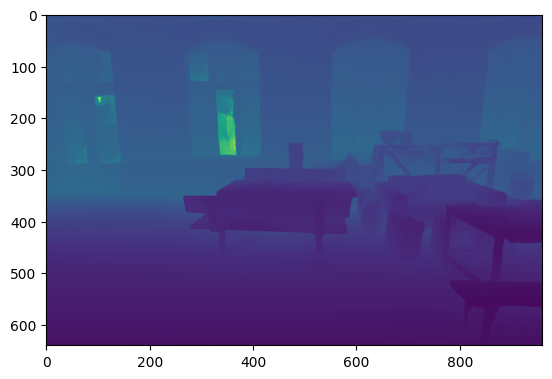

In [9]:
plt.imshow(depth[0])

In [11]:
depth.min(), depth.max(), depth.mean()

(tensor(0.0068), tensor(0.0883), tensor(0.0230))

In [12]:
(depth * 50 + 0.5).min(), (depth * 50 + 0.5).max(), (depth * 50 + 0.5).mean()

(tensor(0.8419), tensor(4.9132), tensor(1.6517))